## Cleaning the waveforms of newly downloaded surface events

The purpose of this notebook is to create a dataframe that contains informaiton about the paths of the cleaned surface events that has a good signal to noise ratio. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import obspy
from glob import glob
from datetime import datetime, timedelta

## Reading the surface event metadata

In [127]:
cat = pd.read_csv("/1-fnp/cascadia/c-whd01/yiyu_data/PNWML/exotic_metadata.csv")
cat.head()

,event_id,source_type,station_network_code,station_channel_code,station_code,station_location_code,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,trace_sampling_rate_hz,trace_start_time,trace_S_arrival_sample,trace_S_onset,trace_P_arrival_sample,trace_P_onset,trace_snr_db
0,pnsn3166678,thunder,CC,BH,CPCO,--,43.722,-121.233,2135.0,"bucket3$0,:3,:18001",100,2021-08-02T03:17:19.000000Z,NaN,NaN,7000.0,emergent,23.922|19.759|28.482
1,pnsn3166673,thunder,UW,EH,NCO,--,43.704,-121.140,1908.0,"bucket3$1,:3,:18001",100,2021-08-02T03:06:44.000000Z,NaN,NaN,7000.0,emergent,nan|nan|18.054
2,pnsn3165628,thunder,CC,BH,CPCO,--,43.722,-121.233,2135.0,"bucket3$2,:3,:18001",100,2021-07-26T12:37:35.000000Z,NaN,NaN,7000.0,impulsive,13.149|20.561|19.350
3,pnsn3165633,thunder,CC,BH,CPCO,--,43.722,-121.233,2135.0,"bucket3$3,:3,:18001",100,2021-07-26T12:30:25.000000Z,NaN,NaN,7000.0,emergent,6.389|6.103|3.934
4,pnsn3162793,thunder,CC,BH,TMBU,--,43.602,-121.145,1743.0,"bucket3$4,:3,:18001",100,2021-06-24T15:01:08.000000Z,NaN,NaN,7000.0,emergent,2.768|0.671|1.021


In [128]:
# selecting surface events from catalog
cat_su = cat[cat['source_type'] == 'surface event']

# collecting unique event ids
uids = np.unique(cat_su['event_id'])

In [129]:
cat_su

,event_id,source_type,station_network_code,station_channel_code,station_code,station_location_code,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,trace_sampling_rate_hz,trace_start_time,trace_S_arrival_sample,trace_S_onset,trace_P_arrival_sample,trace_P_onset,trace_snr_db
355,pnsn3179368,surface event,UW,HH,RCM,--,46.836,-121.733,3085.0,"bucket1$0,:3,:18001",100,2021-12-22T04:49:15.000000Z,NaN,NaN,7000.0,emergent,6.493|2.298|0.447
356,pnsn3179093,surface event,CC,BH,VALT,--,46.214,-122.189,1681.0,"bucket1$1,:3,:18001",100,2021-12-19T07:32:46.000000Z,NaN,NaN,7000.0,emergent,-2.019|1.492|-1.325
357,pnsn3179088,surface event,CC,BH,HOA,--,46.242,-122.192,1151.0,"bucket1$2,:3,:18001",100,2021-12-19T07:28:28.000000Z,NaN,NaN,7000.0,emergent,6.657|-3.429|8.158
358,pnsn3178938,surface event,UW,HH,RCM,--,46.836,-121.733,3085.0,"bucket1$3,:3,:18001",100,2021-12-17T16:48:47.000000Z,NaN,NaN,7000.0,emergent,10.592|16.458|17.760
359,pnsn3177563,surface event,CC,BH,SEP,--,46.200,-122.191,2114.0,"bucket1$4,:3,:18001",100,2021-12-07T09:43:56.000000Z,NaN,NaN,7000.0,emergent,-0.222|6.356|2.264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9262,pnsn830593,surface event,UW,EH,EDM,--,46.197,-122.151,1609.0,"bucket1$8993,:3,:18001",100,2002-01-02T17:38:01.000000Z,NaN,NaN,7000.0,impulsive,nan|nan|-1.162
9263,pnsn830593,surface event,UW,EH,YEL,--,46.209,-122.189,1750.0,"bucket1$8994,:3,:18001",100,2002-01-02T17:37:59.000000Z,NaN,NaN,7000.0,impulsive,nan|nan|14.469
9264,pnsn830593,surface event,UW,EH,SEP,--,46.200,-122.191,2116.0,"bucket1$8995,:3,:18001",100,2002-01-02T17:37:59.000000Z,NaN,NaN,7000.0,impulsive,nan|nan|4.575
9265,pnsn829903,surface event,UW,EH,YEL,--,46.209,-122.189,1750.0,"bucket1$8996,:3,:18001",100,2002-01-01T21:34:30.000000Z,NaN,NaN,7000.0,impulsive,nan|nan|12.728


In [130]:
d_files = glob('../data/surface_event_waveforms/*')
t = []
for i in range(len(d_files)):
    t.append(d_files[i].split('__')[1])
    


## Defining helpful functions

In [131]:
# Function to convert the timestamp format
def convert_timestamp(input_time):
    dt = datetime.strptime(input_time, '%Y%m%dT%H%M%SZ')
    dt += timedelta(seconds=70)  # Add 70 seconds
    return str(dt.strftime('%Y-%m-%dT%H:%M:%S.%fZ'))

def extract_eventid(input_time, cat_su):
    return cat_su[cat_su['trace_start_time'] == input_time]['event_id'].values[0]

def extract_snr_yiyu(file):
    tr = obspy.read(file)[0]
    tr.detrend()
    tr.resample(100)
    sr = tr.stats.sampling_rate
    no_win = tr.data[int(0*sr):int(3*sr)]
    denom = np.percentile(np.abs(no_win), 0.98)

    sig_win = tr.data[int(10*sr):int(13*sr)]
    numer = np.percentile(np.abs(sig_win), 0.98)

    return 20*np.log10(numer/denom)

def extract_snr_akash(file):
    tr = obspy.read(file)[0]
    tr.detrend()
    tr.resample(100)
    tr.filter('bandpass', freqmin = 1, freqmax = 20)
    sr = tr.stats.sampling_rate
    
    denom = np.std(abs(tr.data))
    numer = np.max(abs(tr.data))

    return numer/denom

def extract_station_info(file):
    network = file.split('/')[-1].split('__')[0].split('.')[0]
    stn = file.split('/')[-1].split('__')[0].split('.')[1]
    location = file.split('/')[-1].split('__')[0].split('.')[2]
    channel = file.split('/')[-1].split('__')[0].split('.')[3]
    
    return network, stn, location, channel

## Updating the new catalog with additional information

In [132]:
# Get the list of files
d_files = glob('../data/surface_event_waveforms/*')

# Create a DataFrame and extract the values
df = pd.DataFrame({'file_path': d_files})
df['extracted_value'] = df['file_path'].apply(lambda x: x.split('__')[1])
df['trace_start_time'] = df['extracted_value'].apply(lambda x: convert_timestamp(x))
df['event_id'] = df['trace_start_time'].apply(lambda x: extract_eventid(x, cat_su))
df['snr'] = df['file_path'].apply(lambda x: extract_snr_akash(x))
df['station_code'] = df['file_path'].apply(lambda x: extract_station_info(x)[1])
df['station_network_code'] = df['file_path'].apply(lambda x: extract_station_info(x)[0])
df['station_channel_code'] = df['file_path'].apply(lambda x: extract_station_info(x)[3])
df['station_location_code'] = df['file_path'].apply(lambda x: extract_station_info(x)[2])

## Plotting the SNR distribution

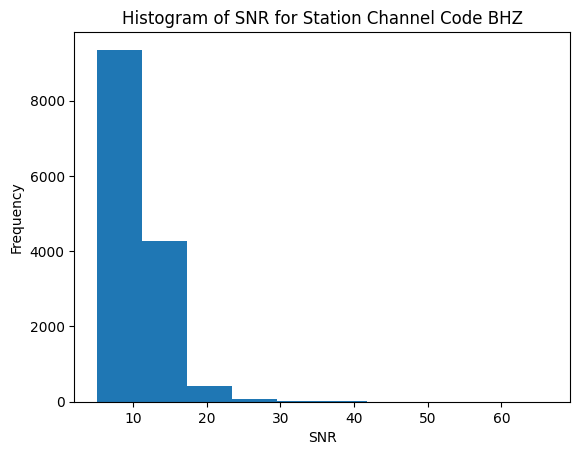

In [133]:
# Filter out rows where 'snr' is NaN, inf, or -inf
cleaned_data = df[df['station_channel_code'] == 'BHZ']['snr']
cleaned_data = cleaned_data[np.isfinite(cleaned_data)]

# Plot the histogram
plt.hist(cleaned_data)
plt.xlabel('SNR')
plt.ylabel('Frequency')
plt.title('Histogram of SNR for Station Channel Code BHZ')
plt.show()


In [134]:
df

,file_path,extracted_value,trace_start_time,event_id,snr,station_code,station_network_code,station_channel_code,station_location_code
0,../data/surface_event_waveforms/CC.VALT..BHE__...,20070327T030102Z,2007-03-27T03:02:12.000000Z,pnsn1002113,15.166670,VALT,CC,BHE,
1,../data/surface_event_waveforms/CC.VALT..BHN__...,20070327T030102Z,2007-03-27T03:02:12.000000Z,pnsn1002113,9.658191,VALT,CC,BHN,
2,../data/surface_event_waveforms/CC.VALT..BHZ__...,20070327T030102Z,2007-03-27T03:02:12.000000Z,pnsn1002113,15.084878,VALT,CC,BHZ,
3,../data/surface_event_waveforms/CC.VALT..BHE__...,20070327T042554Z,2007-03-27T04:27:04.000000Z,pnsn1002133,17.239677,VALT,CC,BHE,
4,../data/surface_event_waveforms/CC.VALT..BHN__...,20070327T042554Z,2007-03-27T04:27:04.000000Z,pnsn1002133,13.662326,VALT,CC,BHN,
...,...,...,...,...,...,...,...,...,...
52411,../data/surface_event_waveforms/CC.VALT..BHN__...,20070515T125016Z,2007-05-15T12:51:26.000000Z,pnsn998638,9.171533,VALT,CC,BHN,
52412,../data/surface_event_waveforms/CC.VALT..BHZ__...,20070515T125016Z,2007-05-15T12:51:26.000000Z,pnsn998638,12.545245,VALT,CC,BHZ,
52413,../data/surface_event_waveforms/TA.F04A..BHE__...,20070515T125016Z,2007-05-15T12:51:26.000000Z,pnsn998638,9.470806,F04A,TA,BHE,
52414,../data/surface_event_waveforms/TA.F04A..BHN__...,20070515T125016Z,2007-05-15T12:51:26.000000Z,pnsn998638,7.921046,F04A,TA,BHN,


In [185]:
df_filtered = df[(df['station_channel_code'] == 'BHN') | (df['station_channel_code'] == 'HHN')]

# filtering by network
df_filtered = df_filtered[(df_filtered['station_network_code'] == 'CC') | (df_filtered['station_network_code'] == 'UW')]
df_final_surface = df_filtered[df_filtered['snr'] > 10]

In [186]:
df_final_surface

,file_path,extracted_value,trace_start_time,event_id,snr,station_code,station_network_code,station_channel_code,station_location_code
4,../data/surface_event_waveforms/CC.VALT..BHN__...,20070327T042554Z,2007-03-27T04:27:04.000000Z,pnsn1002133,13.662326,VALT,CC,BHN,
7,../data/surface_event_waveforms/CC.SWFL..BHN__...,20070128T221646Z,2007-01-28T22:17:56.000000Z,pnsn1003458,21.925673,SWFL,CC,BHN,
10,../data/surface_event_waveforms/CC.VALT..BHN__...,20070331T043435Z,2007-03-31T04:35:45.000000Z,pnsn1003743,15.829949,VALT,CC,BHN,
13,../data/surface_event_waveforms/CC.VALT..BHN__...,20070802T102620Z,2007-08-02T10:27:30.000000Z,pnsn1004993,10.552246,VALT,CC,BHN,
16,../data/surface_event_waveforms/CC.VALT..BHN__...,20070710T022546Z,2007-07-10T02:26:56.000000Z,pnsn1005503,13.624090,VALT,CC,BHN,
...,...,...,...,...,...,...,...,...,...
52333,../data/surface_event_waveforms/UW.LON..BHN__2...,20060830T062501Z,2006-08-30T06:26:11.000000Z,pnsn990623,13.813825,LON,UW,BHN,
52357,../data/surface_event_waveforms/UW.LON..BHN__2...,20061130T041335Z,2006-11-30T04:14:45.000000Z,pnsn991783,14.199901,LON,UW,BHN,
52369,../data/surface_event_waveforms/UW.LON..BHN__2...,20070501T000653Z,2007-05-01T00:08:03.000000Z,pnsn993093,10.803047,LON,UW,BHN,
52384,../data/surface_event_waveforms/UW.LON..BHN__2...,20070601T225309Z,2007-06-01T22:54:19.000000Z,pnsn993443,12.697431,LON,UW,BHN,


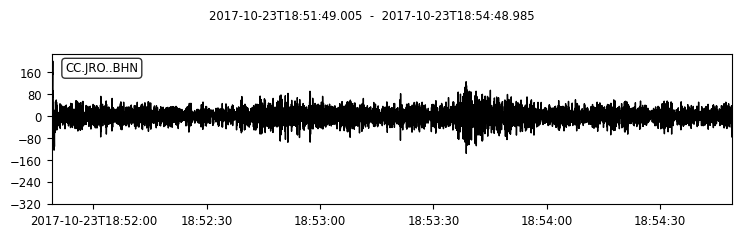

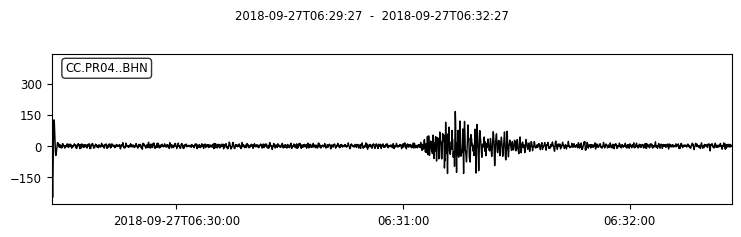

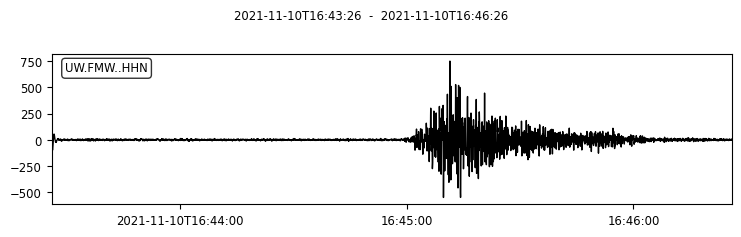

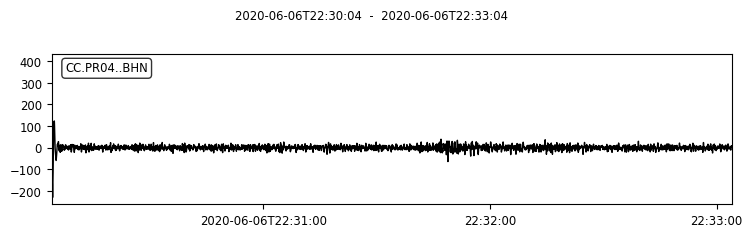

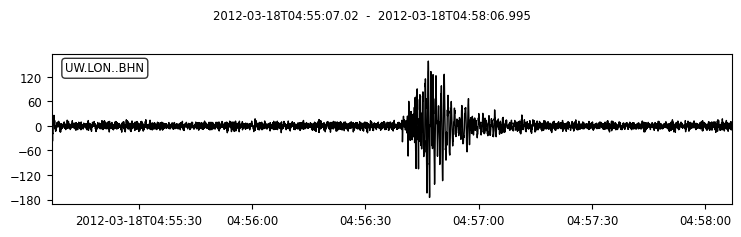

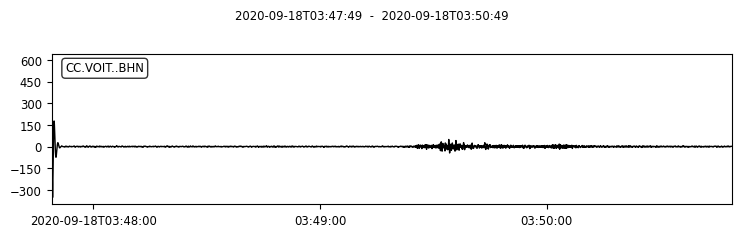

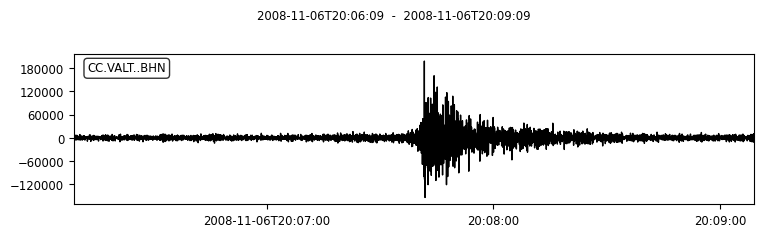

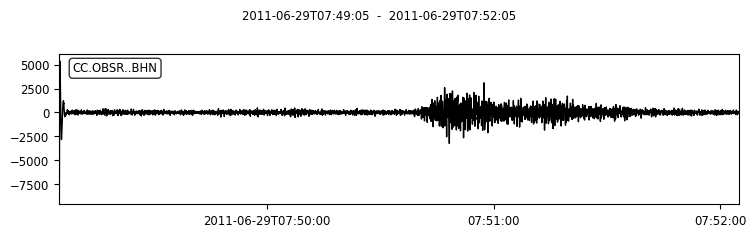

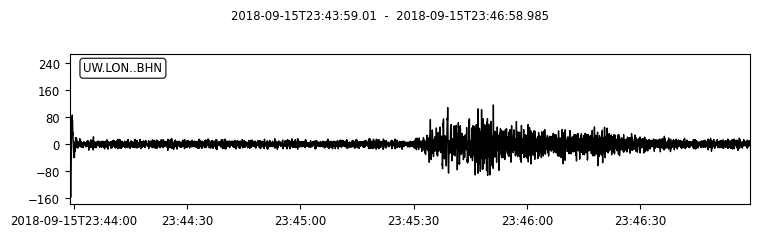

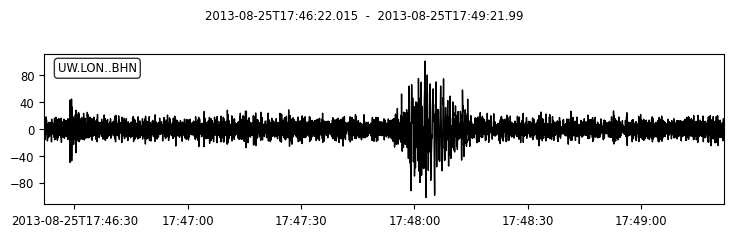

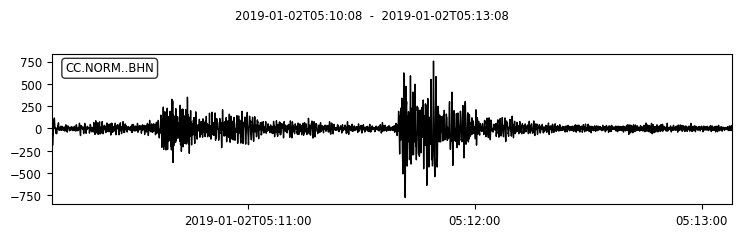

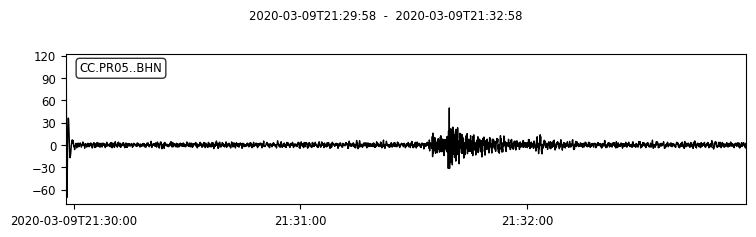

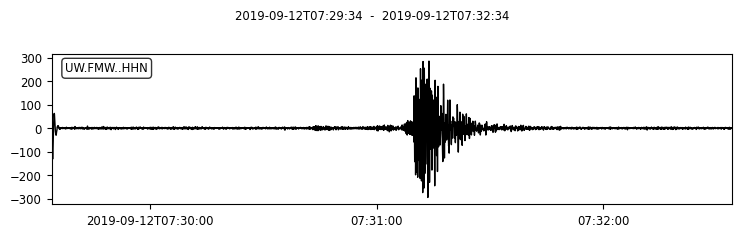

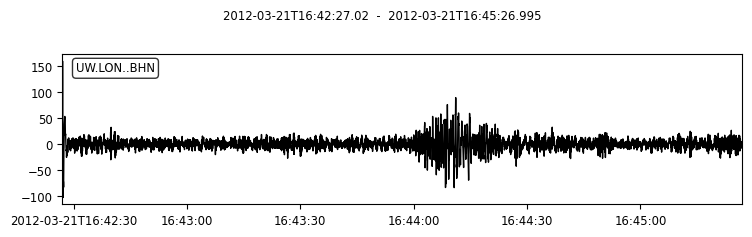

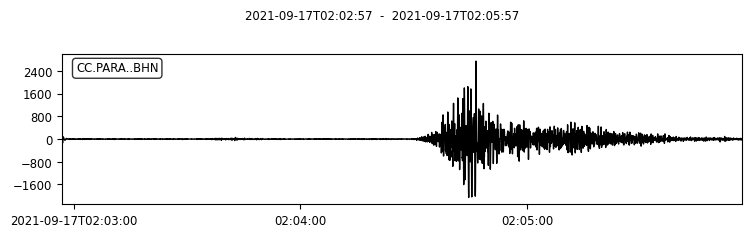

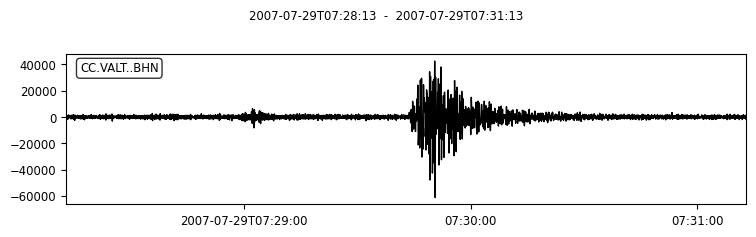

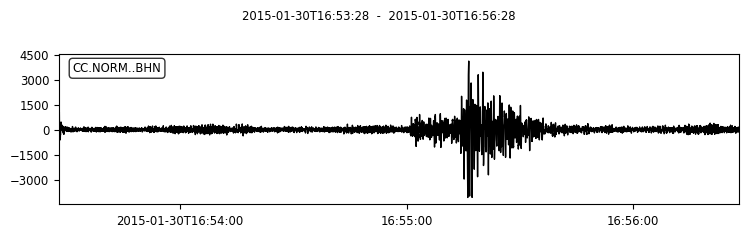

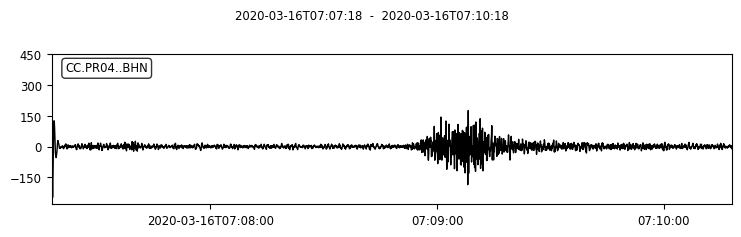

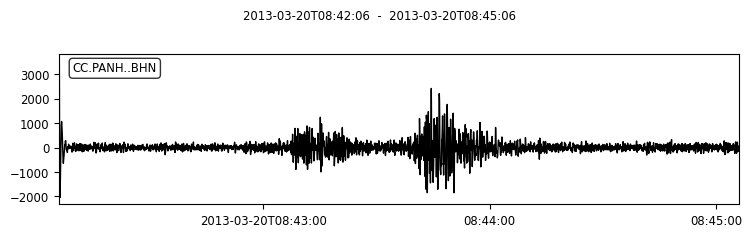

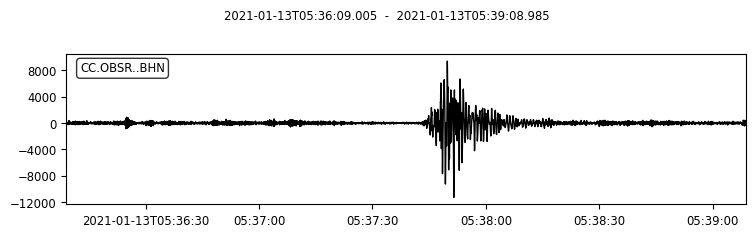

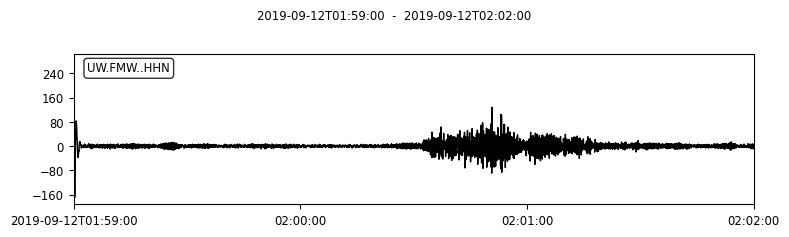

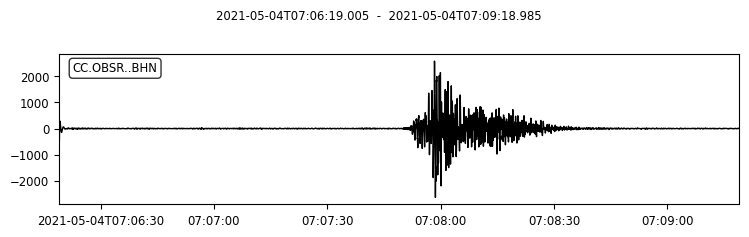

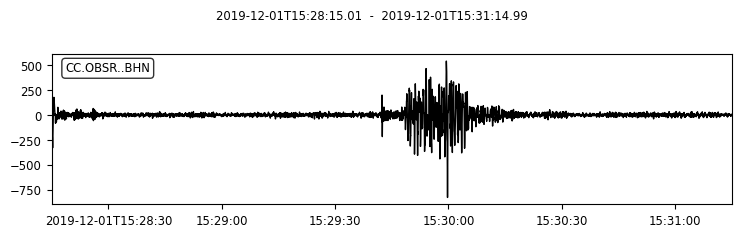

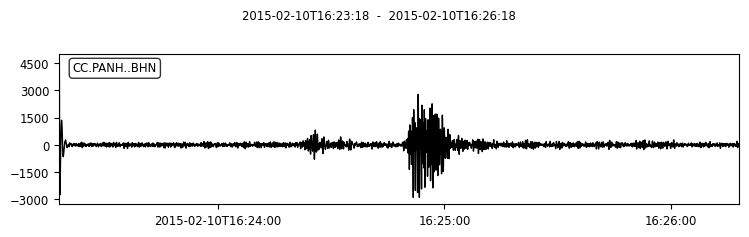

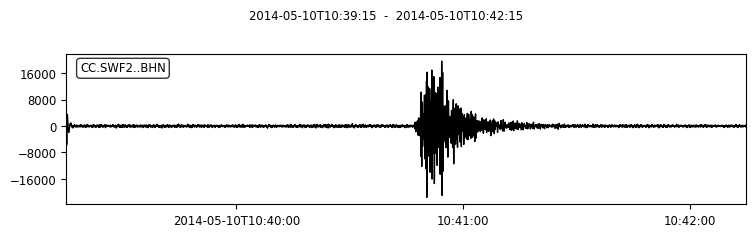

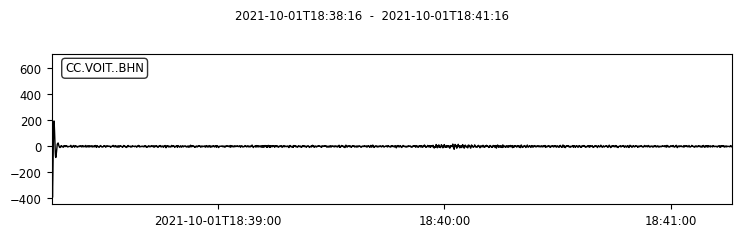

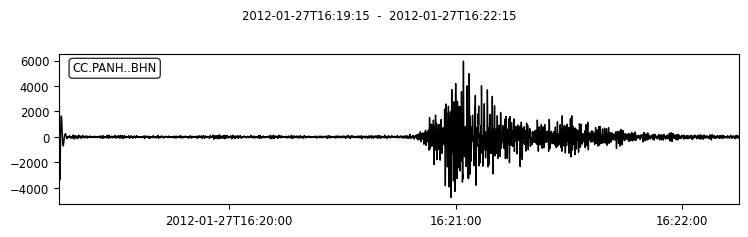

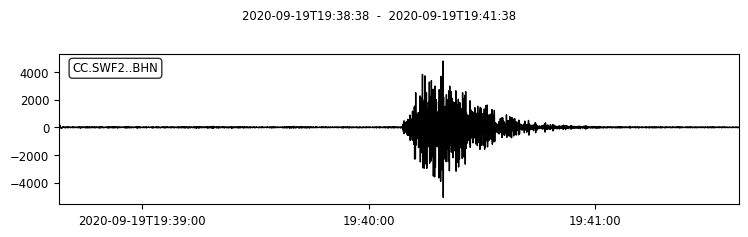

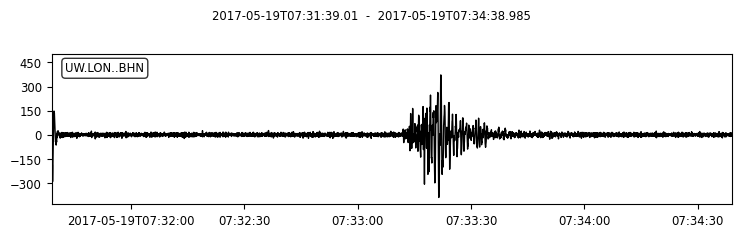

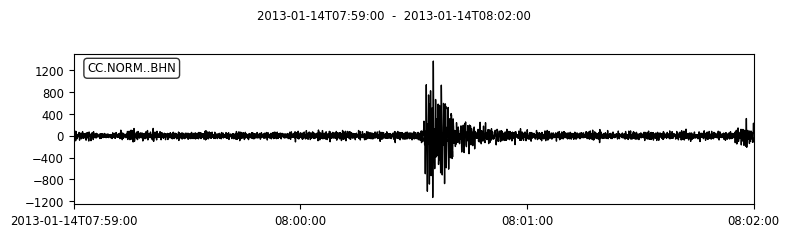

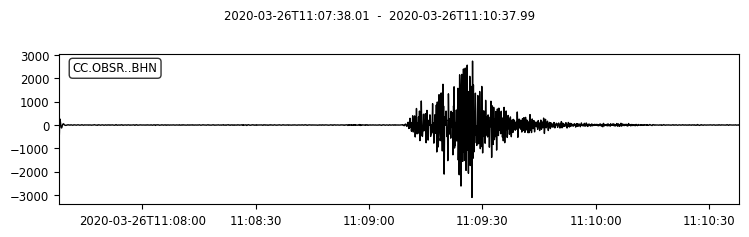

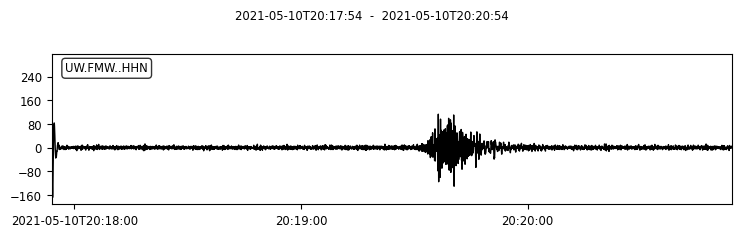

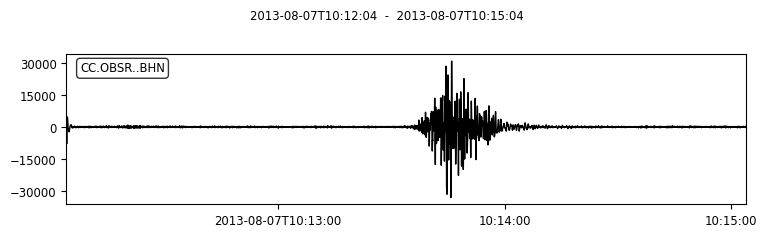

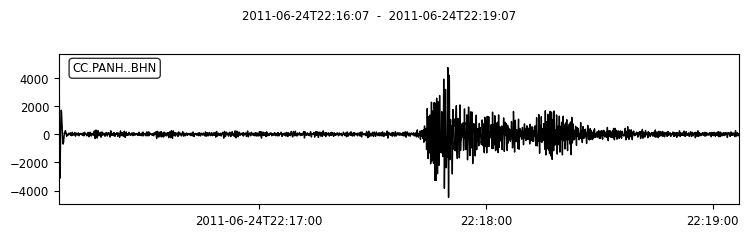

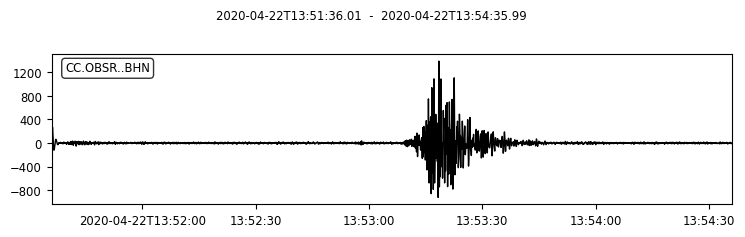

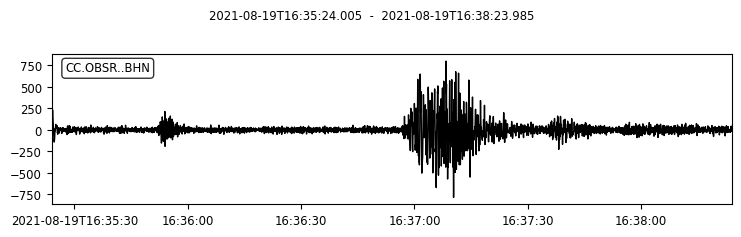

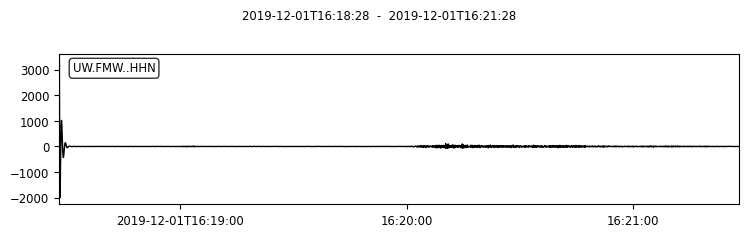

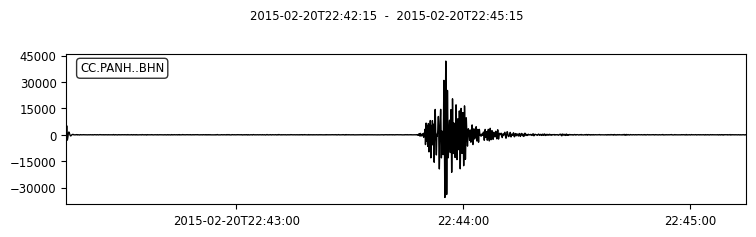

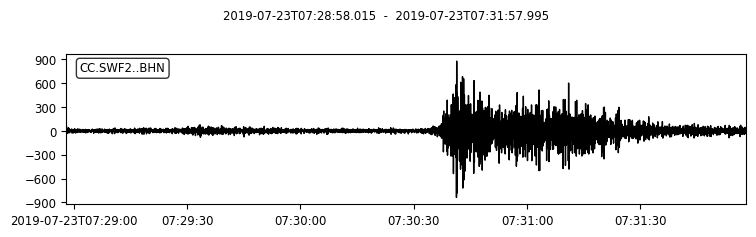

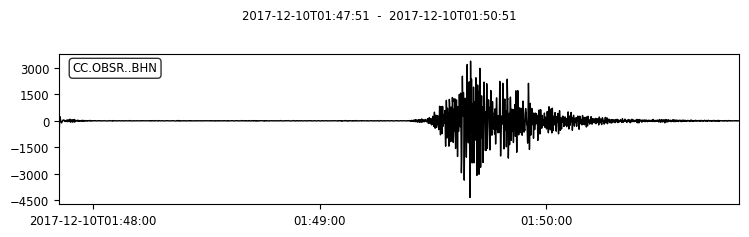

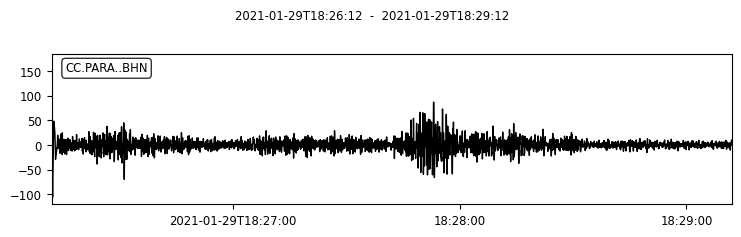

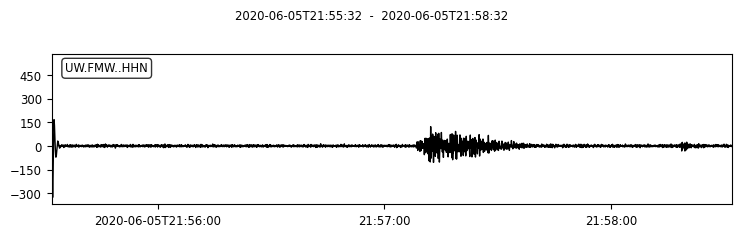

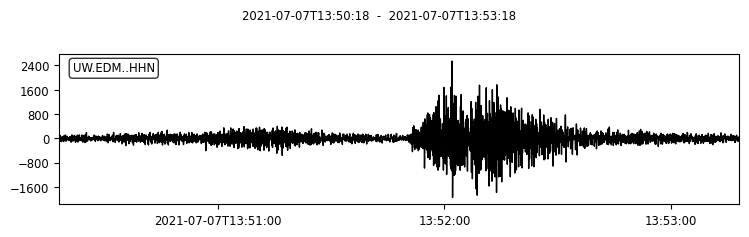

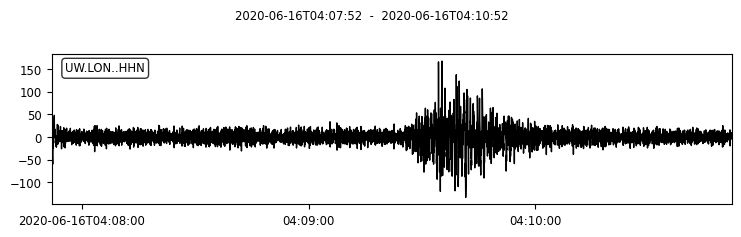

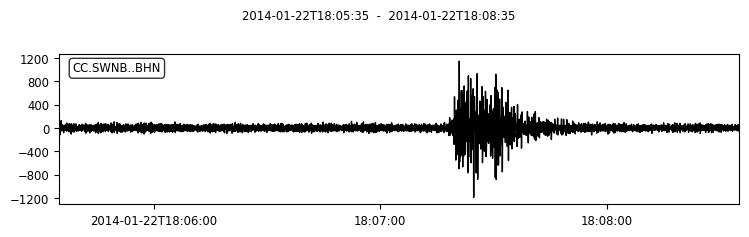

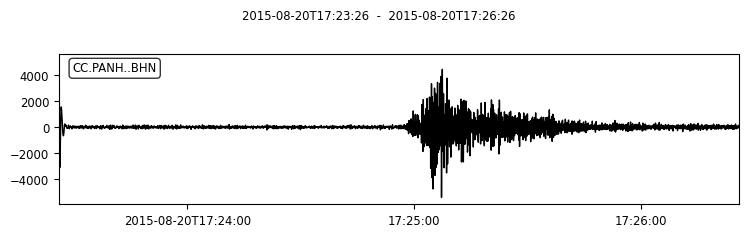

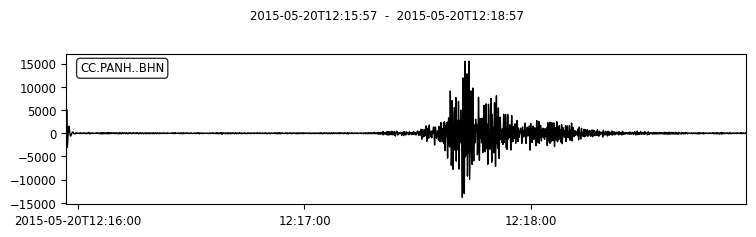

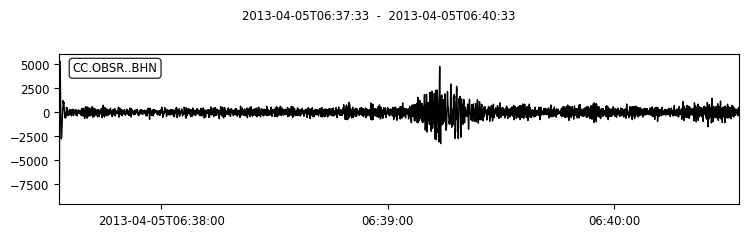

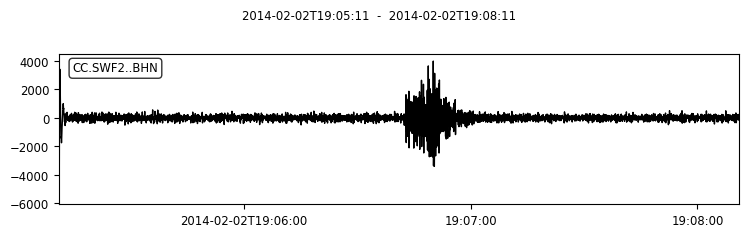

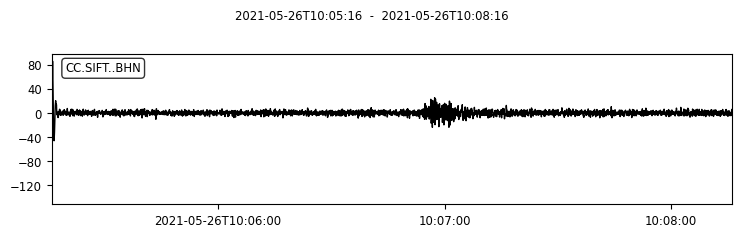

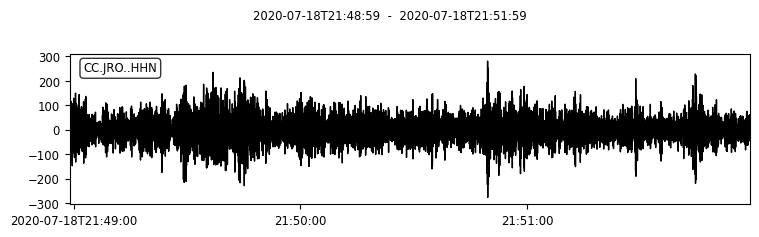

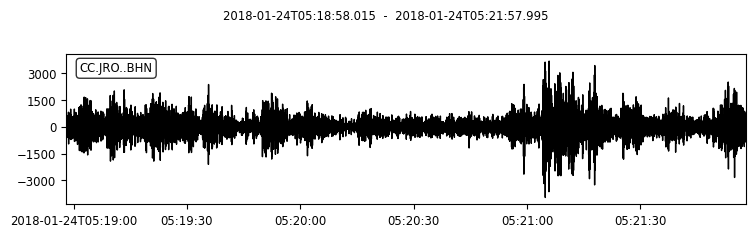

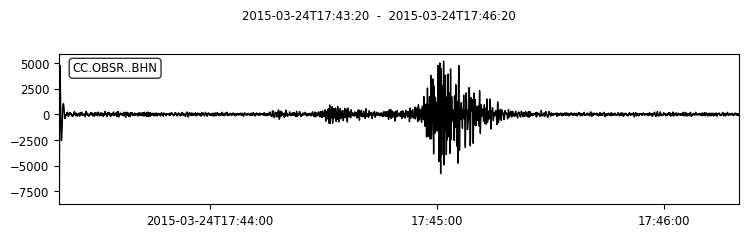

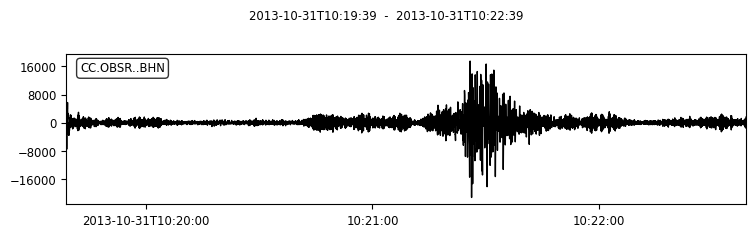

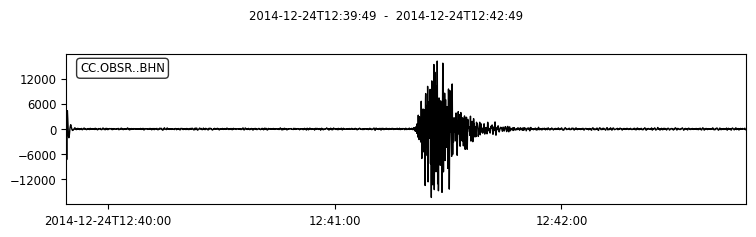

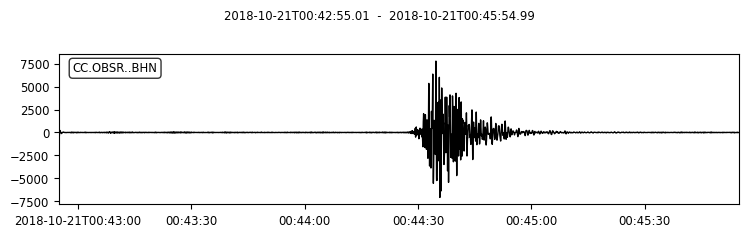

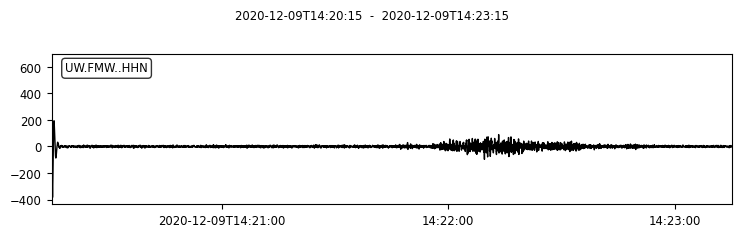

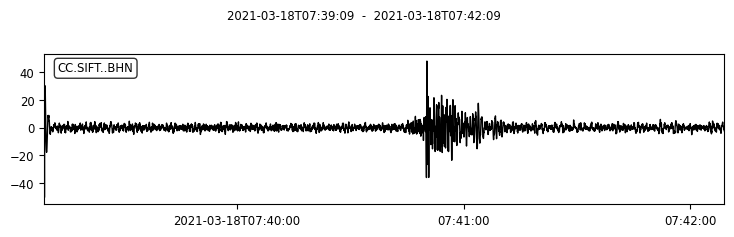

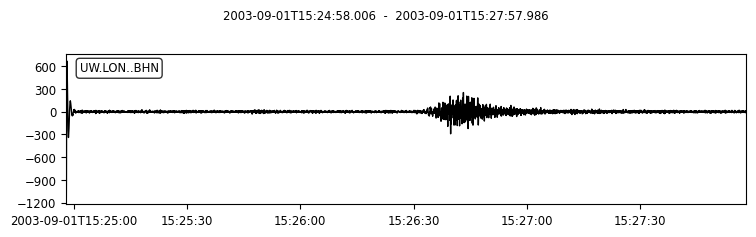

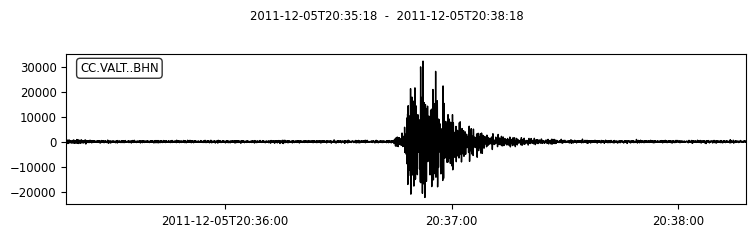

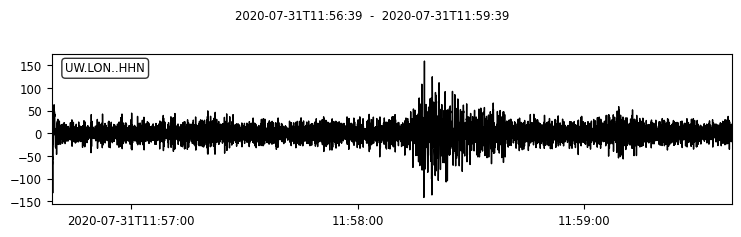

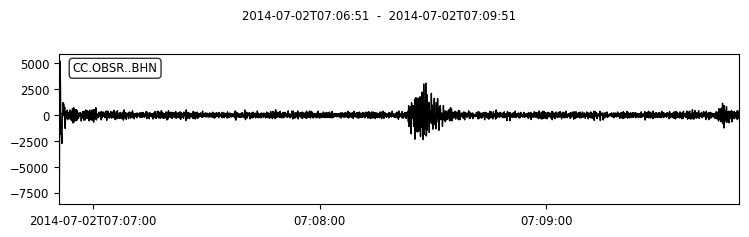

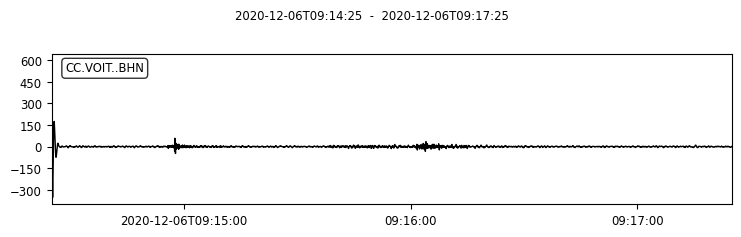

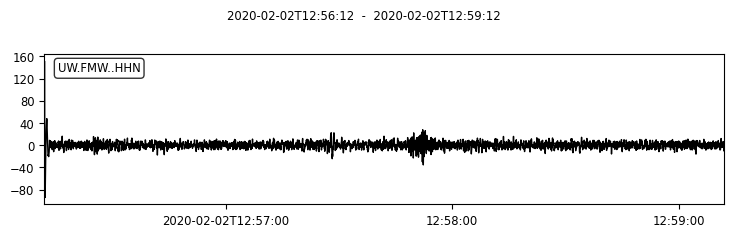

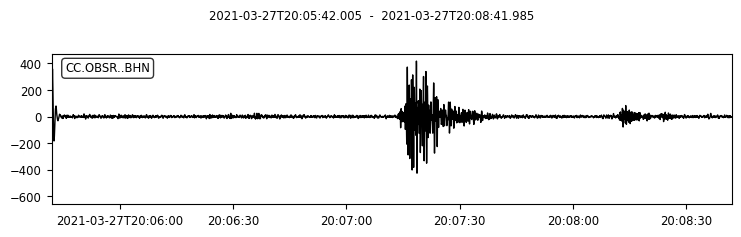

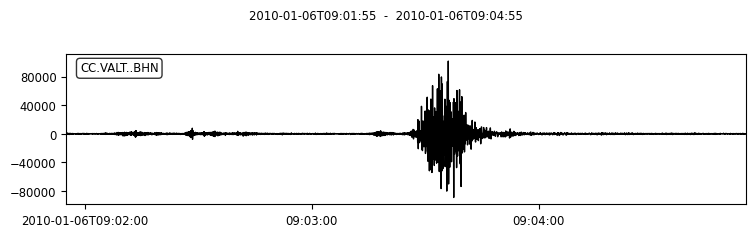

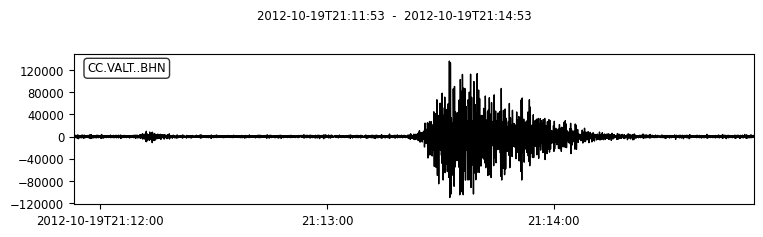

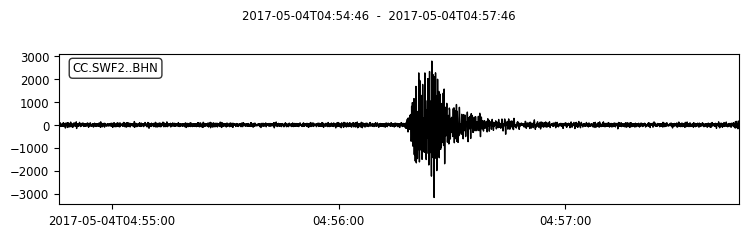

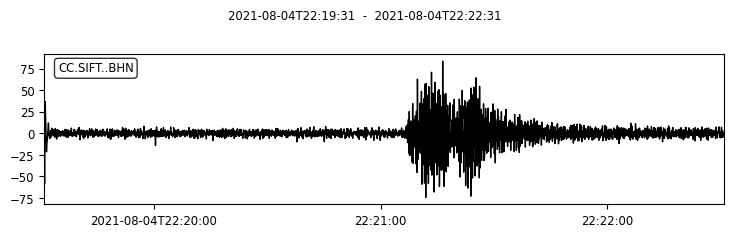

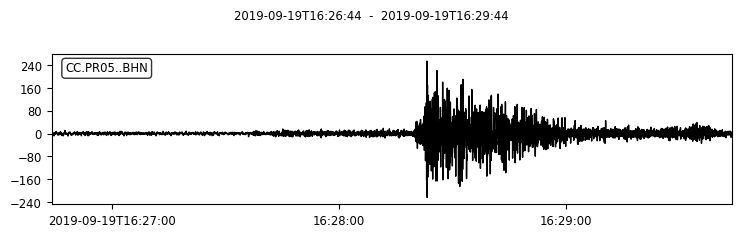

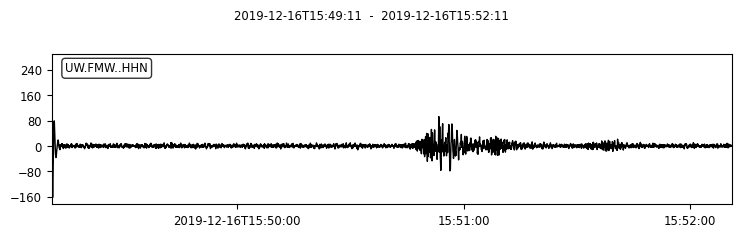

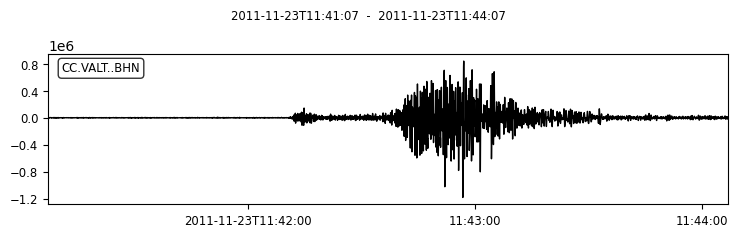

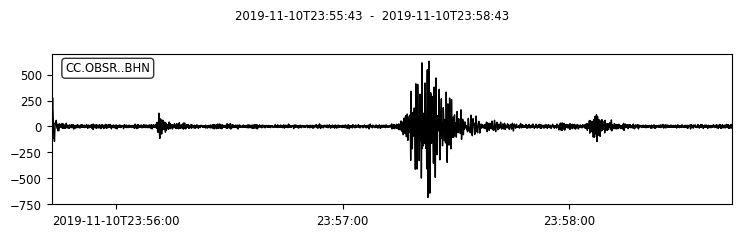

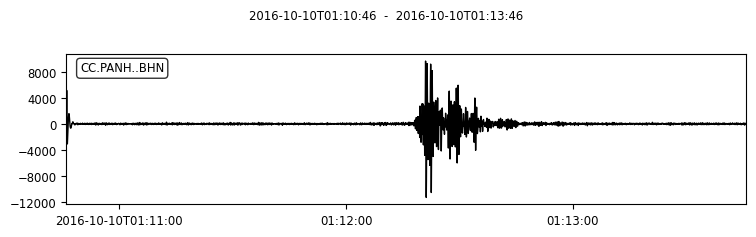

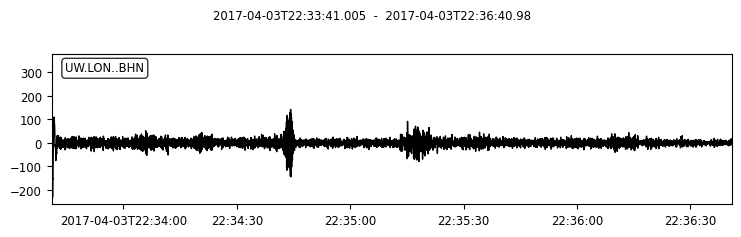

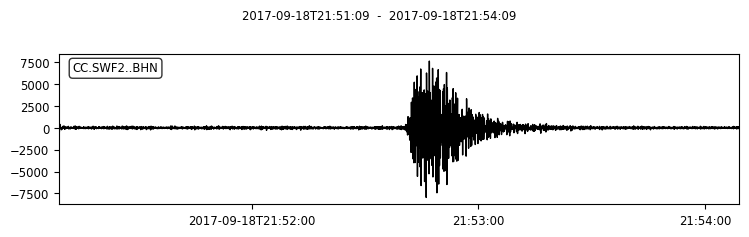

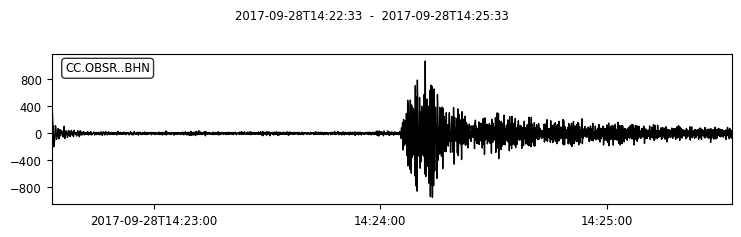

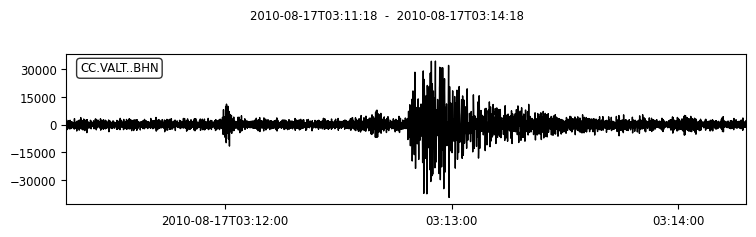

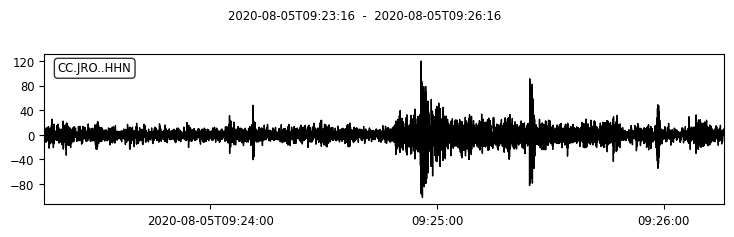

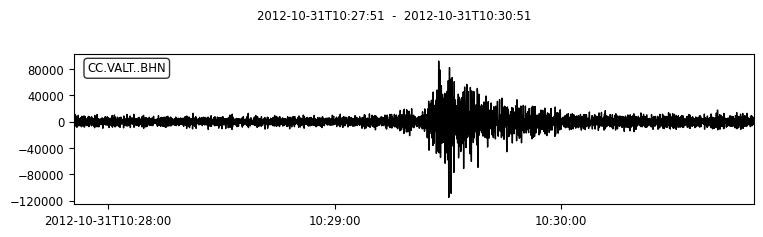

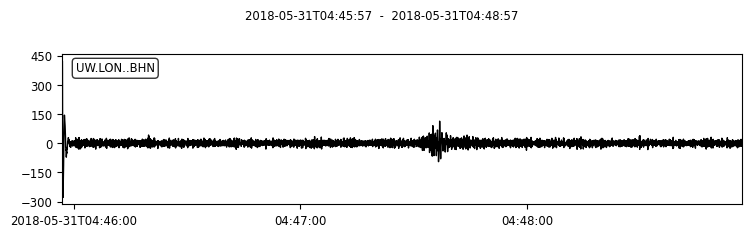

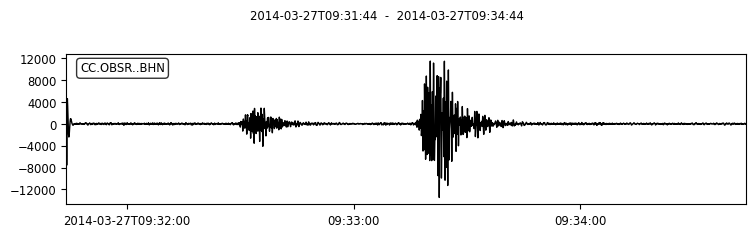

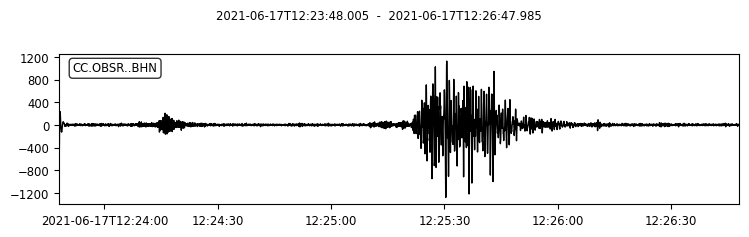

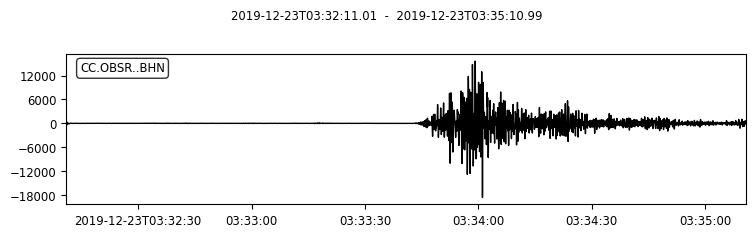

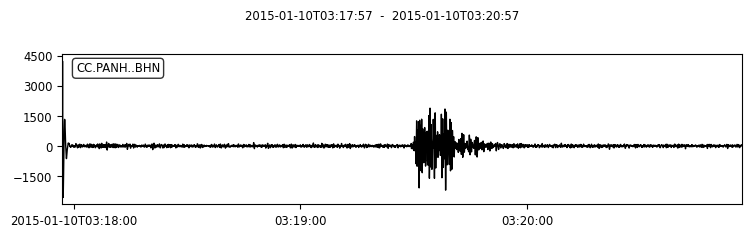

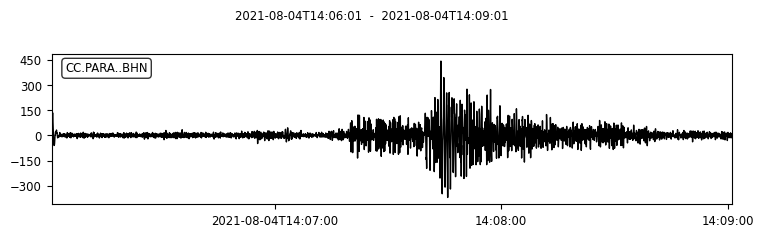

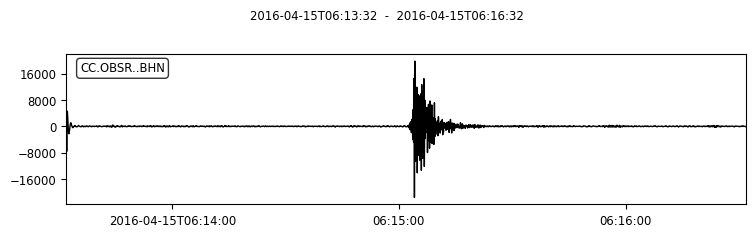

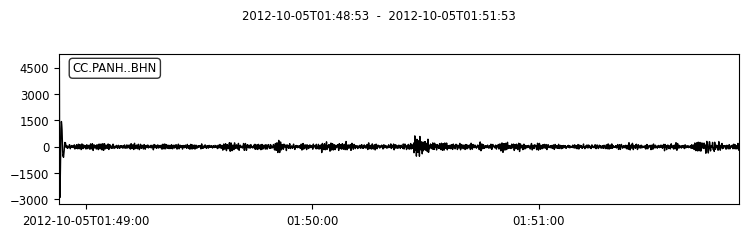

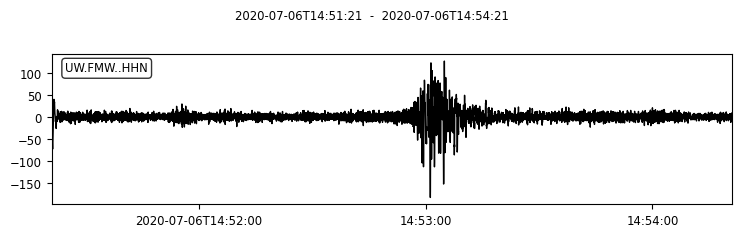

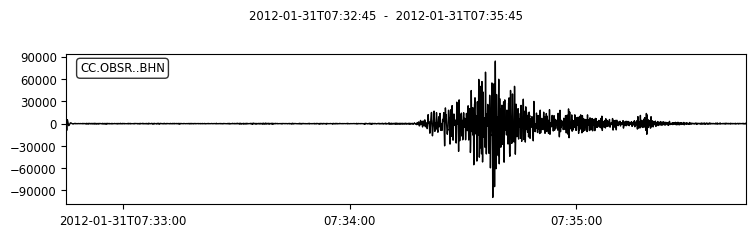

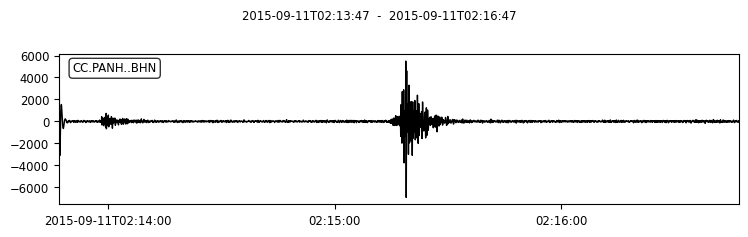

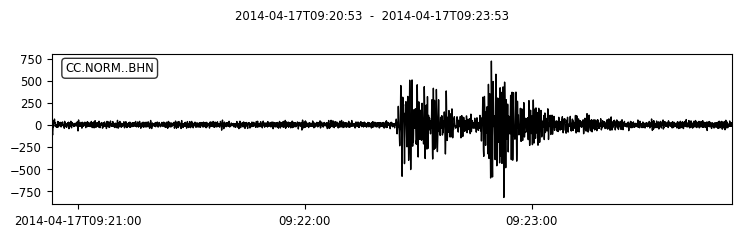

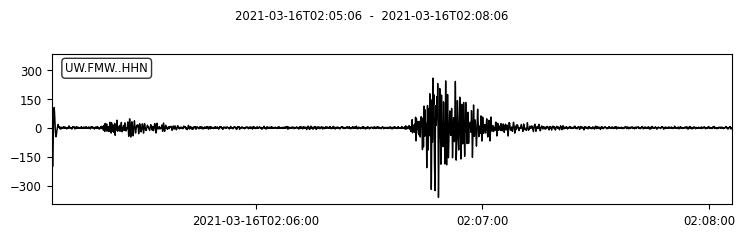

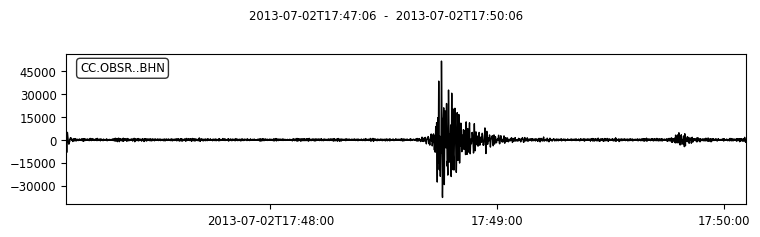

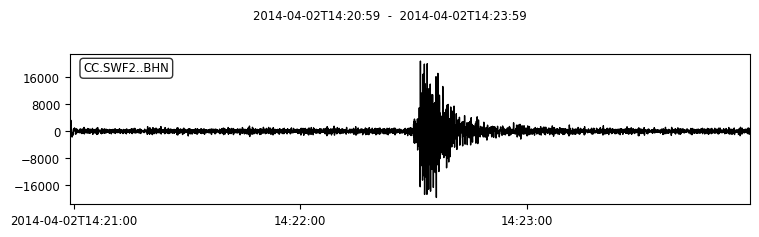

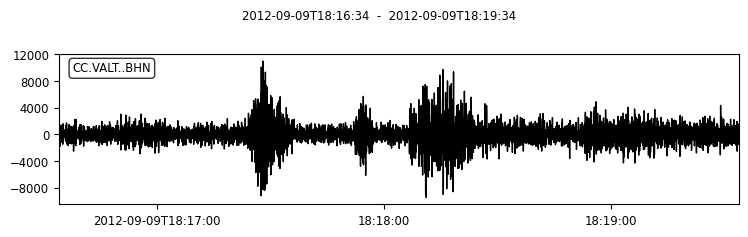

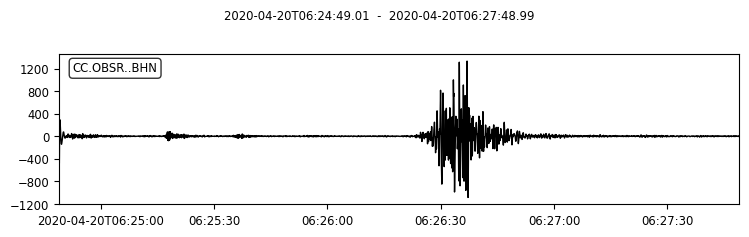

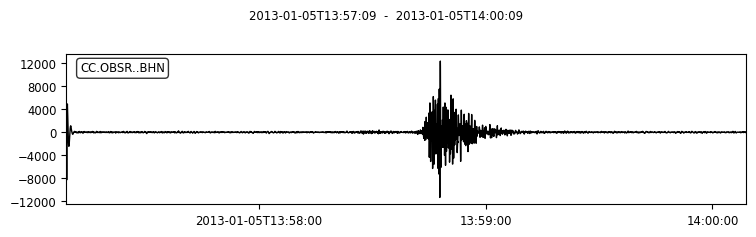

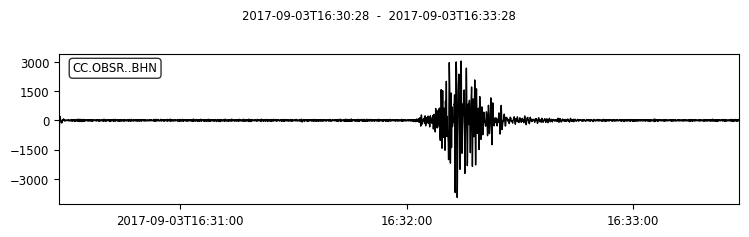

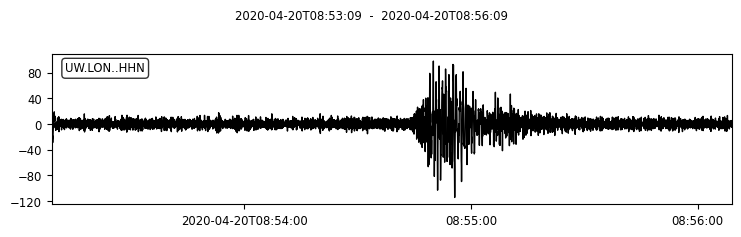

In [198]:
for i in range(100):
    r = np.random.randint(0,6517)
    file = df_final_surface['file_path'].values[r]
    st = obspy.read(file)
    st.filter('bandpass', freqmin = 1, freqmax = 10)
    st.plot()

In [199]:
df_final_surface.to_csv('../data/additional_surface_events_good_snr.csv')